Brief description of the Jupyter Notebook:
Simple webscraper to get a dataframe for analysis, json webscraper needs to be fixed, still working on that.

I used a simple function to clean the "content" column and get more accurate results trying to extract sentiment out of the tweets, I experimented with Vader, need to explore 
K-Means.

Very limited success overall

* Overall Idea on how to implement Spacy & Pipeline: https://www.kaggle.com/code/shivamburnwal/nlp-98-acc-eda-with-model-using-spacy-pipeline          
* Extracting sentiment out unlabelled data: https://www.kaggle.com/code/accountstatus/k-means-vs-vader-vs-textblob-sentiment-analysis/notebook

In [1]:
import jsonpickle
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import random, time

In [2]:
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

In [3]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from imblearn.pipeline import make_pipeline

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.metrics import accuracy_score, recall_score, plot_confusion_matrix

In [5]:
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn import metrics

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [7]:
import matplotlib as mpl 
import matplotlib.cm as cm 
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import seaborn as sns

In [8]:
import json, os, sys
import snscrape.modules.twitter as sntwitter
import datetime, time, requests
from datetime import datetime 
from datetime import date
from datetime import timedelta

In [9]:
import requests
import time, random
from stem import Signal
from stem.control import Controller
from fake_useragent import UserAgent
import random, time

In [10]:
from time import time

import warnings
warnings.filterwarnings("ignore")

In [11]:
import pandas as pd
import numpy as np
import re
import plotly.graph_objects as go
import pandas as pd
import nltk
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
import textblob
import plotly.express as px
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from sklearn.cluster import MiniBatchKMeans
import seaborn as sns
nltk.download('vader_lexicon')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from nltk.sentiment.vader import SentimentIntensityAnalyzer as vad
import plotly
plotly.offline.init_notebook_mode (connected = True)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [12]:
language = 'lang:es'  #set language to Chinese
location = '10.500000, -66.916664, 2000km'

In [13]:
proxies = {
    'http': 'socks5://127.0.0.1:9050',
    'https': 'socks5://127.0.0.1:9050'
}

url = 'https://ident.me'

In [14]:
def renew_ip():
    with Controller.from_port(port=9051) as c:
        c.authenticate(password='kalilinux')
        c.signal(Signal.NEWNYM)

In [15]:
current_datetime = datetime.now()
print(current_datetime)

2022-10-06 20:09:18.436086


In [16]:
date = date.today()
print(date)

2022-10-06


In [17]:
previous_hour = current_datetime - timedelta(hours=1)
print(previous_hour)

2022-10-06 19:09:18.436086


In [18]:
Tweets = "SpanishTweets" + str(date) + ".json"

In [19]:
tweets = []

In [20]:
for r in range (10):
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper(language, 'since:previous_hour until:current_datetime').get_items()):
        if i>=500:
            break
        tweets.append({"tweet":tweet, "date":tweet.date, "id":tweet.id, "content":tweet.content, "user":tweet.user.username})
        
        #tweets.append({"tweet":tweet, "date":tweet.date, "id":tweet.id, "content":tweet.content, "user":tweet.user.username})
        #with open(Tweets, 'w', encoding='utf-8') as f:json.dumps({"tweet":tweet, "date":tweet.date, "id":tweet.id, "content":tweet.content, "user":tweet.user.username})

In [21]:
print(len(tweets))

5000


In [22]:
type(tweets)

list

In [23]:
tweets

[{'tweet': Tweet(url='https://twitter.com/sebastiantaiel6/status/1578175617069355009', date=datetime.datetime(2022, 10, 7, 0, 9, 22, tzinfo=datetime.timezone.utc), content='@Carmen98833881 Lastima que no te juntas con la gente humilde sino te invito a fumar un fernet 🤣', renderedContent='@Carmen98833881 Lastima que no te juntas con la gente humilde sino te invito a fumar un fernet 🤣', id=1578175617069355009, user=User(username='sebastiantaiel6', id=1481020591452917765, displayname='Sebastian Gonzalez', description='Mi hijo martiniano 🤩', rawDescription='Mi hijo martiniano 🤩', descriptionUrls=None, verified=False, created=datetime.datetime(2022, 1, 11, 21, 50, 36, tzinfo=datetime.timezone.utc), followersCount=45, friendsCount=137, statusesCount=847, favouritesCount=1180, listedCount=0, mediaCount=130, location='', protected=False, linkUrl=None, linkTcourl=None, profileImageUrl='https://pbs.twimg.com/profile_images/1550233677988347904/dFWh8Tia_normal.jpg', profileBannerUrl='https://pbs.t

In [24]:
Tweets = pd.DataFrame.from_records(tweets)

In [25]:
Tweets['content'][0]

'@Carmen98833881 Lastima que no te juntas con la gente humilde sino te invito a fumar un fernet 🤣'

In [26]:
Tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   tweet    5000 non-null   object             
 1   date     5000 non-null   datetime64[ns, UTC]
 2   id       5000 non-null   int64              
 3   content  5000 non-null   object             
 4   user     5000 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(3)
memory usage: 195.4+ KB


In [27]:
Tweets

,tweet,date,id,content,user
0,https://twitter.com/sebastiantaiel6/status/157...,2022-10-07 00:09:22+00:00,1578175617069355009,@Carmen98833881 Lastima que no te juntas con l...,sebastiantaiel6
1,https://twitter.com/Jupiarel/status/1578175616...,2022-10-07 00:09:22+00:00,1578175616964124672,@AlcortaLourdes Lo tienen secuestrado o que??,Jupiarel
2,https://twitter.com/sannntiiAago/status/157817...,2022-10-07 00:09:22+00:00,1578175616821522432,@BocaJrsOficial VAMO VAMO XENEIZE VAMO VAMO XE...,sannntiiAago
3,https://twitter.com/CabreraAlarcon8/status/157...,2022-10-07 00:09:22+00:00,1578175616758689792,Quiero que todos nos vean agarrados de mano,CabreraAlarcon8
4,https://twitter.com/lunaamelll/status/15781756...,2022-10-07 00:09:22+00:00,1578175616746037250,estoy teniendo dolores d ovarios (o eso creo q...,lunaamelll
...,...,...,...,...,...
4995,https://twitter.com/Hernanhernan53/status/1578...,2022-10-07 00:11:56+00:00,1578176261519986689,@jguaido No comento. https://t.co/I3e9UgIWCj,Hernanhernan53
4996,https://twitter.com/IAmJoseNew/status/15781762...,2022-10-07 00:11:56+00:00,1578176261477715969,Por algo lo decía \nSin tarot. 🙃 https://t.co/...,IAmJoseNew
4997,https://twitter.com/Juan_demor/status/15781762...,2022-10-07 00:11:56+00:00,1578176261452574720,@nomecayona Otra purutana que no se entera de ...,Juan_demor
4998,https://twitter.com/jaimecaroo/status/15781762...,2022-10-07 00:11:56+00:00,1578176261452464128,@PresidenciaRD @RDMOPC Los que tenemos familia...,jaimecaroo


In [28]:
Tweets['content']

0       @Carmen98833881 Lastima que no te juntas con l...
1           @AlcortaLourdes Lo tienen secuestrado o que??
2       @BocaJrsOficial VAMO VAMO XENEIZE VAMO VAMO XE...
3             Quiero que todos nos vean agarrados de mano
4       estoy teniendo dolores d ovarios (o eso creo q...
                              ...                        
4995         @jguaido No comento. https://t.co/I3e9UgIWCj
4996    Por algo lo decía \nSin tarot. 🙃 https://t.co/...
4997    @nomecayona Otra purutana que no se entera de ...
4998    @PresidenciaRD @RDMOPC Los que tenemos familia...
4999    @Lopeztronauta ¿Canción de reggaeton?, yo solo...
Name: content, Length: 5000, dtype: object

*******************************************************************************************************************************

In [29]:
def clean_text(text):
    #Remove URLs
    text = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', text, flags=re.MULTILINE)
    #Remove Hashtags
    #text = re.sub(r'\B#\S+','',text)
    #Removing mentions @?
    text = re.sub('@[^\s]+','',text)
    #Removing single characters in the text
    text = re.sub(r'\s+[a-zA-Z]\s+', '', text)
    #Substitute multiple spaces with single spaces
    text =re.sub(r'\s+', ' ', text, flags=re.I)
    # Removing spaces and converting text into lowercase
    return text

#.strip().lower()

In [30]:
Tweets['clean_content'] = Tweets['content'].apply(lambda text:clean_text(text))

In [31]:
Tweets

,tweet,date,id,content,user,clean_content
0,https://twitter.com/sebastiantaiel6/status/157...,2022-10-07 00:09:22+00:00,1578175617069355009,@Carmen98833881 Lastima que no te juntas con l...,sebastiantaiel6,Lastima que no te juntas con la gente humilde...
1,https://twitter.com/Jupiarel/status/1578175616...,2022-10-07 00:09:22+00:00,1578175616964124672,@AlcortaLourdes Lo tienen secuestrado o que??,Jupiarel,Lo tienen secuestradoque??
2,https://twitter.com/sannntiiAago/status/157817...,2022-10-07 00:09:22+00:00,1578175616821522432,@BocaJrsOficial VAMO VAMO XENEIZE VAMO VAMO XE...,sannntiiAago,VAMO VAMO XENEIZE VAMO VAMO XENEIZE VAMO BOOC...
3,https://twitter.com/CabreraAlarcon8/status/157...,2022-10-07 00:09:22+00:00,1578175616758689792,Quiero que todos nos vean agarrados de mano,CabreraAlarcon8,Quiero que todos nos vean agarrados de mano
4,https://twitter.com/lunaamelll/status/15781756...,2022-10-07 00:09:22+00:00,1578175616746037250,estoy teniendo dolores d ovarios (o eso creo q...,lunaamelll,estoy teniendo doloresovarios (o eso creoson) ...
...,...,...,...,...,...,...
4995,https://twitter.com/Hernanhernan53/status/1578...,2022-10-07 00:11:56+00:00,1578176261519986689,@jguaido No comento. https://t.co/I3e9UgIWCj,Hernanhernan53,No comento.
4996,https://twitter.com/IAmJoseNew/status/15781762...,2022-10-07 00:11:56+00:00,1578176261477715969,Por algo lo decía \nSin tarot. 🙃 https://t.co/...,IAmJoseNew,Por algo lo decía Sin tarot. 🙃
4997,https://twitter.com/Juan_demor/status/15781762...,2022-10-07 00:11:56+00:00,1578176261452574720,@nomecayona Otra purutana que no se entera de ...,Juan_demor,Otra purutana que no se entera de la película...
4998,https://twitter.com/jaimecaroo/status/15781762...,2022-10-07 00:11:56+00:00,1578176261452464128,@PresidenciaRD @RDMOPC Los que tenemos familia...,jaimecaroo,Los que tenemos familias allá sabemos que est...


In [32]:
def remove_emojis(data):
    emoj = re.compile("["
        u"\U00002700-\U000027BF"  # Dingbats
        u"\U0001F600-\U0001F64F"  # Emoticons
        u"\U00002600-\U000026FF"  # Miscellaneous Symbols
        u"\U0001F300-\U0001F5FF"  # Miscellaneous Symbols And Pictographs
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U0001F680-\U0001F6FF"  # Transport and Map Symbols
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [33]:
Tweets['clean_content'] = Tweets['clean_content'].apply(lambda text:remove_emojis(text))

In [34]:
Tweets

,tweet,date,id,content,user,clean_content
0,https://twitter.com/sebastiantaiel6/status/157...,2022-10-07 00:09:22+00:00,1578175617069355009,@Carmen98833881 Lastima que no te juntas con l...,sebastiantaiel6,Lastima que no te juntas con la gente humilde...
1,https://twitter.com/Jupiarel/status/1578175616...,2022-10-07 00:09:22+00:00,1578175616964124672,@AlcortaLourdes Lo tienen secuestrado o que??,Jupiarel,Lo tienen secuestradoque??
2,https://twitter.com/sannntiiAago/status/157817...,2022-10-07 00:09:22+00:00,1578175616821522432,@BocaJrsOficial VAMO VAMO XENEIZE VAMO VAMO XE...,sannntiiAago,VAMO VAMO XENEIZE VAMO VAMO XENEIZE VAMO BOOC...
3,https://twitter.com/CabreraAlarcon8/status/157...,2022-10-07 00:09:22+00:00,1578175616758689792,Quiero que todos nos vean agarrados de mano,CabreraAlarcon8,Quiero que todos nos vean agarrados de mano
4,https://twitter.com/lunaamelll/status/15781756...,2022-10-07 00:09:22+00:00,1578175616746037250,estoy teniendo dolores d ovarios (o eso creo q...,lunaamelll,estoy teniendo doloresovarios (o eso creoson) ...
...,...,...,...,...,...,...
4995,https://twitter.com/Hernanhernan53/status/1578...,2022-10-07 00:11:56+00:00,1578176261519986689,@jguaido No comento. https://t.co/I3e9UgIWCj,Hernanhernan53,No comento.
4996,https://twitter.com/IAmJoseNew/status/15781762...,2022-10-07 00:11:56+00:00,1578176261477715969,Por algo lo decía \nSin tarot. 🙃 https://t.co/...,IAmJoseNew,Por algo lo decía Sin tarot.
4997,https://twitter.com/Juan_demor/status/15781762...,2022-10-07 00:11:56+00:00,1578176261452574720,@nomecayona Otra purutana que no se entera de ...,Juan_demor,Otra purutana que no se entera de la película...
4998,https://twitter.com/jaimecaroo/status/15781762...,2022-10-07 00:11:56+00:00,1578176261452464128,@PresidenciaRD @RDMOPC Los que tenemos familia...,jaimecaroo,Los que tenemos familias allá sabemos que est...


*****************************************************************************************************

In [35]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as vad

#### Vader Sentiment Analysis

In [36]:
# Invoking the TFIDFVectorizer
tf_data=TfidfVectorizer()
# Copying the data into a new dataframe called vader
vader=Tweets.copy()

sentiment=vad()
# Making additional columns for sentiment score in the vader dataframe
sen=['Positive','Negative','Neutral']
sentiments=[sentiment.polarity_scores(i) for i in Tweets['clean_content'].values]
vader['Negative Score']=[i['neg'] for i in sentiments]
vader['Positive Score']=[i['pos'] for i in sentiments]
vader['Neutral Score']=[i['neu'] for i in sentiments]
vader['Compound Score']=[i['compound'] for i in sentiments]
score=vader['Compound Score'].values
t=[]
for i in score:
    if i >=0.05 :
        t.append('Positive')
    elif i<=-0.05 :
        t.append('Negative')
    else:
        t.append('Neutral')
vader['Overall Sentiment']=t

In [37]:
# Having a look at the vader datafram
vader.head()

,tweet,date,id,content,user,clean_content,Negative Score,Positive Score,Neutral Score,Compound Score,Overall Sentiment
0,https://twitter.com/sebastiantaiel6/status/157...,2022-10-07 00:09:22+00:00,1578175617069355009,@Carmen98833881 Lastima que no te juntas con l...,sebastiantaiel6,Lastima que no te juntas con la gente humilde...,0.145,0.0,0.855,-0.296,Negative
1,https://twitter.com/Jupiarel/status/1578175616...,2022-10-07 00:09:22+00:00,1578175616964124672,@AlcortaLourdes Lo tienen secuestrado o que??,Jupiarel,Lo tienen secuestradoque??,0.000,0.0,1.000,0.000,Neutral
2,https://twitter.com/sannntiiAago/status/157817...,2022-10-07 00:09:22+00:00,1578175616821522432,@BocaJrsOficial VAMO VAMO XENEIZE VAMO VAMO XE...,sannntiiAago,VAMO VAMO XENEIZE VAMO VAMO XENEIZE VAMO BOOC...,0.000,0.0,1.000,0.000,Neutral
3,https://twitter.com/CabreraAlarcon8/status/157...,2022-10-07 00:09:22+00:00,1578175616758689792,Quiero que todos nos vean agarrados de mano,CabreraAlarcon8,Quiero que todos nos vean agarrados de mano,0.000,0.0,1.000,0.000,Neutral
4,https://twitter.com/lunaamelll/status/15781756...,2022-10-07 00:09:22+00:00,1578175616746037250,estoy teniendo dolores d ovarios (o eso creo q...,lunaamelll,estoy teniendo doloresovarios (o eso creoson) ...,0.000,0.0,1.000,0.000,Neutral


In [38]:
vader.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   tweet              5000 non-null   object             
 1   date               5000 non-null   datetime64[ns, UTC]
 2   id                 5000 non-null   int64              
 3   content            5000 non-null   object             
 4   user               5000 non-null   object             
 5   clean_content      5000 non-null   object             
 6   Negative Score     5000 non-null   float64            
 7   Positive Score     5000 non-null   float64            
 8   Neutral Score      5000 non-null   float64            
 9   Compound Score     5000 non-null   float64            
 10  Overall Sentiment  5000 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(4), int64(1), object(5)
memory usage: 429.8+ KB


In [39]:
Tweets['clean_content'][4]

'estoy teniendo doloresovarios (o eso creoson) por primera vez en mi vida.'

In [40]:
fig=px.histogram(data_frame=vader,x='Compound Score',color='Overall Sentiment',template='plotly')
fig.show()

<AxesSubplot:xlabel='Overall Sentiment', ylabel='count'>

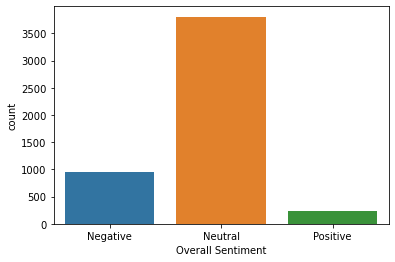

In [41]:
sns.countplot(vader['Overall Sentiment'])

In [42]:
vader_data=tf_data.fit_transform(vader['clean_content'].values)

In [43]:
pca = PCA(n_components=3).fit_transform(vader_data.todense())

In [44]:
px.scatter_3d(x=pca[:,0],y=pca[:,1],z=pca[:,2],color=vader['Overall Sentiment'].values)

*******************************************************************************************************************************

In [45]:
vader['Overall Sentiment'].replace({"Neutral":0 , "Negative":1 ,"Positive":2} , inplace=True)

In [46]:
def process_tweet(tweet):
   
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('spanish')
    
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean

In [47]:
vader['clean_content1']= vader['content'].apply(process_tweet)

In [48]:
vader

,tweet,date,id,content,user,clean_content,Negative Score,Positive Score,Neutral Score,Compound Score,Overall Sentiment,clean_content1
0,https://twitter.com/sebastiantaiel6/status/157...,2022-10-07 00:09:22+00:00,1578175617069355009,@Carmen98833881 Lastima que no te juntas con l...,sebastiantaiel6,Lastima que no te juntas con la gente humilde...,0.145,0.0,0.855,-0.2960,1,"[lastima, junta, gent, humild, sino, invito, f..."
1,https://twitter.com/Jupiarel/status/1578175616...,2022-10-07 00:09:22+00:00,1578175616964124672,@AlcortaLourdes Lo tienen secuestrado o que??,Jupiarel,Lo tienen secuestradoque??,0.000,0.0,1.000,0.0000,0,[secuestrado]
2,https://twitter.com/sannntiiAago/status/157817...,2022-10-07 00:09:22+00:00,1578175616821522432,@BocaJrsOficial VAMO VAMO XENEIZE VAMO VAMO XE...,sannntiiAago,VAMO VAMO XENEIZE VAMO VAMO XENEIZE VAMO BOOC...,0.000,0.0,1.000,0.0000,0,"[vamo, vamo, xeneiz, vamo, vamo, xeneiz, vamo,..."
3,https://twitter.com/CabreraAlarcon8/status/157...,2022-10-07 00:09:22+00:00,1578175616758689792,Quiero que todos nos vean agarrados de mano,CabreraAlarcon8,Quiero que todos nos vean agarrados de mano,0.000,0.0,1.000,0.0000,0,"[quiero, vean, agarrado, mano]"
4,https://twitter.com/lunaamelll/status/15781756...,2022-10-07 00:09:22+00:00,1578175616746037250,estoy teniendo dolores d ovarios (o eso creo q...,lunaamelll,estoy teniendo doloresovarios (o eso creoson) ...,0.000,0.0,1.000,0.0000,0,"[dolor, d, ovario, creo, q, primera, vez, vida]"
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,https://twitter.com/Hernanhernan53/status/1578...,2022-10-07 00:11:56+00:00,1578176261519986689,@jguaido No comento. https://t.co/I3e9UgIWCj,Hernanhernan53,No comento.,0.688,0.0,0.312,-0.2960,1,[comento]
4996,https://twitter.com/IAmJoseNew/status/15781762...,2022-10-07 00:11:56+00:00,1578176261477715969,Por algo lo decía \nSin tarot. 🙃 https://t.co/...,IAmJoseNew,Por algo lo decía Sin tarot.,0.419,0.0,0.581,-0.5574,1,"[decía, tarot, 🙃]"
4997,https://twitter.com/Juan_demor/status/15781762...,2022-10-07 00:11:56+00:00,1578176261452574720,@nomecayona Otra purutana que no se entera de ...,Juan_demor,Otra purutana que no se entera de la película...,0.136,0.0,0.864,-0.2960,1,"[purutana, entera, película, queréi, trist, ta..."
4998,https://twitter.com/jaimecaroo/status/15781762...,2022-10-07 00:11:56+00:00,1578176261452464128,@PresidenciaRD @RDMOPC Los que tenemos familia...,jaimecaroo,Los que tenemos familias allá sabemos que est...,0.000,0.0,1.000,0.0000,0,"[familia, allá, sabemo, completament, real, me..."


In [49]:
import string
import spacy
from spacy.lang.es.stop_words import STOP_WORDS
from spacy.lang.es import Spanish

punctuations = string.punctuation
nlp = spacy.load('es_core_news_sm')
stop_words = spacy.lang.es.stop_words.STOP_WORDS

parser = Spanish()

def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]
    return mytokens

In [50]:
# Now Let's clean our reviews 
vader['clean_content1']= vader['clean_content'].apply(spacy_tokenizer)

In [51]:
vader

,tweet,date,id,content,user,clean_content,Negative Score,Positive Score,Neutral Score,Compound Score,Overall Sentiment,clean_content1
0,https://twitter.com/sebastiantaiel6/status/157...,2022-10-07 00:09:22+00:00,1578175617069355009,@Carmen98833881 Lastima que no te juntas con l...,sebastiantaiel6,Lastima que no te juntas con la gente humilde...,0.145,0.0,0.855,-0.2960,1,[]
1,https://twitter.com/Jupiarel/status/1578175616...,2022-10-07 00:09:22+00:00,1578175616964124672,@AlcortaLourdes Lo tienen secuestrado o que??,Jupiarel,Lo tienen secuestradoque??,0.000,0.0,1.000,0.0000,0,[]
2,https://twitter.com/sannntiiAago/status/157817...,2022-10-07 00:09:22+00:00,1578175616821522432,@BocaJrsOficial VAMO VAMO XENEIZE VAMO VAMO XE...,sannntiiAago,VAMO VAMO XENEIZE VAMO VAMO XENEIZE VAMO BOOC...,0.000,0.0,1.000,0.0000,0,[]
3,https://twitter.com/CabreraAlarcon8/status/157...,2022-10-07 00:09:22+00:00,1578175616758689792,Quiero que todos nos vean agarrados de mano,CabreraAlarcon8,Quiero que todos nos vean agarrados de mano,0.000,0.0,1.000,0.0000,0,[]
4,https://twitter.com/lunaamelll/status/15781756...,2022-10-07 00:09:22+00:00,1578175616746037250,estoy teniendo dolores d ovarios (o eso creo q...,lunaamelll,estoy teniendo doloresovarios (o eso creoson) ...,0.000,0.0,1.000,0.0000,0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,https://twitter.com/Hernanhernan53/status/1578...,2022-10-07 00:11:56+00:00,1578176261519986689,@jguaido No comento. https://t.co/I3e9UgIWCj,Hernanhernan53,No comento.,0.688,0.0,0.312,-0.2960,1,[]
4996,https://twitter.com/IAmJoseNew/status/15781762...,2022-10-07 00:11:56+00:00,1578176261477715969,Por algo lo decía \nSin tarot. 🙃 https://t.co/...,IAmJoseNew,Por algo lo decía Sin tarot.,0.419,0.0,0.581,-0.5574,1,[]
4997,https://twitter.com/Juan_demor/status/15781762...,2022-10-07 00:11:56+00:00,1578176261452574720,@nomecayona Otra purutana que no se entera de ...,Juan_demor,Otra purutana que no se entera de la película...,0.136,0.0,0.864,-0.2960,1,[]
4998,https://twitter.com/jaimecaroo/status/15781762...,2022-10-07 00:11:56+00:00,1578176261452464128,@PresidenciaRD @RDMOPC Los que tenemos familia...,jaimecaroo,Los que tenemos familias allá sabemos que est...,0.000,0.0,1.000,0.0000,0,[]


In [57]:
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

#def clean_text(text):
    #return text.strip().lower()

In [63]:
bow_vector = CountVectorizer(tokenizer = process_tweet, ngram_range=(1,1))

In [64]:
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer, ngram_range= (1, 1))

In [65]:
from sklearn.model_selection import train_test_split
X = vader['content']
y = vader['Overall Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

pipe = Pipeline([
    ("cleaner" , predictors()),
    ("vectorizer" , bow_vector),
    ("predictor" , clf)])
pipe.fit(X_train,y_train)

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x000001CE1CA75640>),
                ('vectorizer',
                 CountVectorizer(tokenizer=<function process_tweet at 0x000001CE1C8CC940>)),
                ('predictor', LogisticRegression())])

In [67]:
# Predicting with a test dataset
predicted = pipe.predict(X_test)

# Model Accuracy
#print("Logistic Regression Accuracy:", accuracy_score(y_test, predicted)
print("Logistic Regression Recall:", recall_score(y_test, predicted, pos_label='positive', average='micro'))

Logistic Regression Recall: 0.8753333333333333


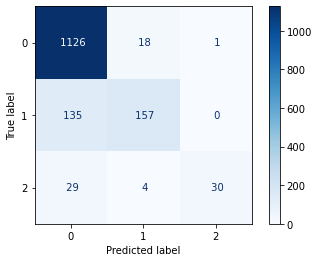

In [68]:
plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', values_format=' ')

*******************************************************************************************************************************

Random Forest Classifier

In [69]:
clf1 = RandomForestClassifier()

pipe = Pipeline([
    ("cleaner" , predictors()),
    ("vectorizer" , bow_vector),
    ("predictor" , clf1)])
pipe.fit(X_train,y_train)

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x000001CE2D3F5490>),
                ('vectorizer',
                 CountVectorizer(tokenizer=<function process_tweet at 0x000001CE1C8CC940>)),
                ('predictor', RandomForestClassifier())])

In [70]:
# Predicting with a test dataset
predicted = pipe.predict(X_test)

# Model Accuracy
#print("Logistic Regression Accuracy:", accuracy_score(y_test, predicted))
#print("Logistic Regression Recall:", recall_score(y_test, predicted))

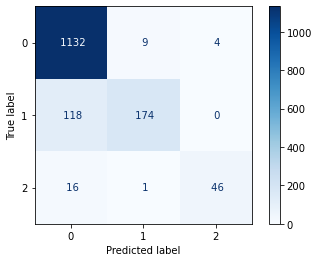

In [71]:
plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', values_format=' ')

*****************************************************************************************************

Support Vector Machine

In [72]:
clf2 = SVC()

pipe = Pipeline([
    ("cleaner" , predictors()),
    ("vectorizer" , bow_vector),
    ("predictor" , clf2)])
pipe.fit(X_train,y_train)

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x000001CE2D41A8B0>),
                ('vectorizer',
                 CountVectorizer(tokenizer=<function process_tweet at 0x000001CE1C8CC940>)),
                ('predictor', SVC())])

In [73]:
# Predicting with a test dataset
predicted = pipe.predict(X_test)

# Model Accuracy

#print("SVC Accuracy:", accuracy_score(y_test, predicted))
#print("SVC Recall:", recall_score(y_test, predicted))

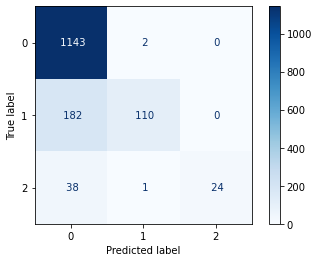

In [74]:
plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', values_format=' ')